<a href="https://colab.research.google.com/github/Asohail115/Ted-Talk-Views-Prediction/blob/main/Ted_Talk_Views_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**TED is devoted to spreading powerful ideas on just about any topic. These datasets contain over 4,000 TED talks including transcripts in many languages Founded in 1984 by Richard Salman as a nonprofit organization that aimed at bringing experts from the fields of Technology, Entertainment, and Design together, TED Conferences have gone on to become the Mecca of ideas from virtually all walks of life. As of 2015, TED and its sister TEDx chapters have published more than 2000 talks for free consumption by the masses and its speaker list boasts of the likes of Al Gore, Jimmy Wales, Shahrukh Khan, and Bill Gates.**

##**Dataset Information**


*   Number of instances: 4,005
*  Number of attributes: 19

### **Features Information:**
### The dataset contains features like:

* **talk_id:** Talk identification number provided by TED
* **title:** Title of the talk
* **speaker_1:** First speaker in TED's speaker list
* **all_speakers:** Speakers in the talk
* **occupations:** Occupations of the speakers
* **about_speakers:** Blurb about each speaker
* **recorded_date:** Date the talk was recorded
* **published_date:** Date the talk was published to TED.com
* **event:** Event or medium in which the talk was given
* **native_lang:** Language the talk was given in
* **available_lang:** All available languages (lang_code) for a talk
* **comments:** Count of comments
* **duration:** Duration in seconds
* **topics:** Related tags or topics for the talk
* **related_talks:** Related talks (key='talk_id',value='title')
* **url:** URL of the talk
* **description:** Description of the talk
* **transcript:** Full transcript of the talk


---

###**Target Variable :**


*   **views**: Count of views


---

###**Goal: The main objective is to build a predictive model, which could help in predicting the views of the videos uploaded on the TEDx website.**

#**Project Work Flow**


---
1. Importing Libraries

2. Loading the Dataset

3. EDA on features

4. Feature Engineering

5. Data Cleaning

6. Feature selection

7. Regression models and HyperParameter Tuning

8. Comparison of Models

9. Final selection of the model

10. Conclusion


---






#**1.Importing all Necessary Libraries**

In [95]:
import pandas as pd
import numpy as np
import time
import datetime
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.neural_network import MLPRegressor
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn import neighbors
from sklearn.svm import SVR
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn import ensemble
from wordcloud import WordCloud,ImageColorGenerator
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

# ignoring warnings.
import warnings
warnings.filterwarnings('ignore')

##**After importing all necessary libraries we have to load the dataset.**
#**2. Loading the dataset**

In [96]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [97]:
df = pd.read_csv("/content/drive/MyDrive/Ted-Talk-Views-Prediction Regression Machine Learning Project/data_ted_talks.csv")

##**Now, let's start EDA on features.**
#**3. EDA on Features**

In [101]:
df.head(5)

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre..."
1,92,The best stats you've ever seen,Hans Rosling,{0: 'Hans Rosling'},{0: ['global health expert; data visionary']},"{0: 'In Hans Rosling’s hands, data sings. Glob...",14501685,2006-02-22,2006-06-27,TED2006,en,"['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...",628.0,1190,"['Africa', 'Asia', 'Google', 'demo', 'economic...","{2056: ""Own your body's data"", 2296: 'A visual...",https://www.ted.com/talks/hans_rosling_the_bes...,You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac..."
2,7,Simplicity sells,David Pogue,{0: 'David Pogue'},{0: ['technology columnist']},{0: 'David Pogue is the personal technology co...,1920832,2006-02-24,2006-06-27,TED2006,en,"['ar', 'bg', 'de', 'el', 'en', 'es', 'fa', 'fr...",124.0,1286,"['computers', 'entertainment', 'interface desi...","{1725: '10 top time-saving tech tips', 2274: '...",https://www.ted.com/talks/david_pogue_simplici...,New York Times columnist David Pogue takes aim...,"(Music: ""The Sound of Silence,"" Simon & Garfun..."
3,53,Greening the ghetto,Majora Carter,{0: 'Majora Carter'},{0: ['activist for environmental justice']},{0: 'Majora Carter redefined the field of envi...,2664069,2006-02-26,2006-06-27,TED2006,en,"['ar', 'bg', 'bn', 'ca', 'cs', 'de', 'en', 'es...",219.0,1116,"['MacArthur grant', 'activism', 'business', 'c...",{1041: '3 stories of local eco-entrepreneurshi...,https://www.ted.com/talks/majora_carter_greeni...,"In an emotionally charged talk, MacArthur-winn...",If you're here today — and I'm very happy that...
4,66,Do schools kill creativity?,Sir Ken Robinson,{0: 'Sir Ken Robinson'},"{0: ['author', 'educator']}","{0: ""Creativity expert Sir Ken Robinson challe...",65051954,2006-02-25,2006-06-27,TED2006,en,"['af', 'ar', 'az', 'be', 'bg', 'bn', 'ca', 'cs...",4931.0,1164,"['children', 'creativity', 'culture', 'dance',...","{865: 'Bring on the learning revolution!', 173...",https://www.ted.com/talks/sir_ken_robinson_do_...,Sir Ken Robinson makes an entertaining and pro...,Good morning. How are you? (Audience) Good. It...


In [102]:
df.tail(5)

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
4000,62678,"Crisis support for the world, one text away",Nancy Lublin,{0: 'Nancy Lublin'},{0: ['health activist']},"{0: 'Nancy Lublin, cofounder and CEO of Crisis...",502934,2020-04-22,2020-04-27,TED2020: The Prequel,en,['en'],6.0,690,"['activism', 'data', 'technology', 'mental hea...",{2362: 'How data from a crisis text line is sa...,https://www.ted.com/talks/nancy_lublin_crisis_...,What if we could help people in crisis anytime...,"""I'm 14, and I want to go home."" ""My name is B..."
4001,62782,The dark history of IQ tests,Stefan C Dombrowski,{0: 'Stefan C Dombrowski'},NaN,NaN,307187,2020-04-27,2020-04-27,TED-Ed,en,"['en', 'es', 'my', 'pt-br']",NaN,346,"['TED-Ed', 'education', 'history', 'animation'...",{35386: 'How does the Rorschach inkblot test w...,https://www.ted.com/talks/stefan_c_dombrowski_...,"In 1905, psychologists Alfred Binet and Théodo...","In 1905, psychologists Alfred Binet and Théodo..."
4002,62263,"How ""policing for profit"" undermines your rights",Dick M. Carpenter II,{0: 'Dick M. Carpenter II'},{0: ['law researcher']},{0: 'Dick M. Carpenter II studies cutting edge...,464414,2019-06-22,2020-04-28,TEDxMileHigh,en,['en'],9.0,774,"['society', 'law', 'policy', 'justice system',...","{2406: 'I love being a police officer, but we ...",https://www.ted.com/talks/dick_m_carpenter_ii_...,"Many countries have an active, centuries-old l...",Picture yourself driving down the road tomorro...
4003,62784,The electrifying speeches of Sojourner Truth,Daina Ramey Berry,{0: 'Daina Ramey Berry'},NaN,NaN,56582,2020-04-28,2020-04-30,TED-Ed,en,['en'],NaN,257,"['TED-Ed', 'education', 'animation', 'United S...",{20973: 'The breathtaking courage of Harriet T...,https://www.ted.com/talks/daina_ramey_berry_th...,Isabella Baumfree was born into slavery in lat...,"In early 1828, Sojourner Truth approached the ..."
4004,62794,The most important anus in the ocean,Cella Wright,{0: 'Cella Wright'},NaN,NaN,0,2020-04-30,2020-04-30,TED-Ed,en,['en'],NaN,281,"['animals', 'TED-Ed', 'animation', 'oceans', '...","{62347: 'The bug that poops candy', 29159: 'In...",https://www.ted.com/talks/cella_wright_the_mos...,Is it a fuzzy sock? An overripe banana? A mold...,Can you guess what you’re looking at? Is it a ...


In [103]:
df.sample(5)

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
703,924,The art of choosing,Sheena Iyengar,{0: 'Sheena Iyengar'},{0: ['psycho-economist']},"{0: ""Sheena Iyengar studies how people choose ...",3644840,2010-07-15,2010-07-26,TEDGlobal 2010,en,"['ar', 'bg', 'cs', 'da', 'de', 'el', 'en', 'es...",976.0,1448,"['business', 'choice', 'culture', 'decision-ma...","{20: 'Choice, happiness and spaghetti sauce', ...",https://www.ted.com/talks/sheena_iyengar_the_a...,Sheena Iyengar studies how we make choices -- ...,"Today, I'm going to take you around the world ..."
138,163,The surprising decline in violence,Steven Pinker,{0: 'Steven Pinker'},{0: ['psychologist']},{0: 'Steven Pinker is a professor of cognitive...,3053218,2007-03-03,2007-09-10,TED2007,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'et...",720.0,1155,"['business', 'culture', 'global issues', 'medi...","{68: 'Progress is not a zero-sum game', 29: 'T...",https://www.ted.com/talks/steven_pinker_the_su...,Steven Pinker charts the decline of violence f...,"Images like this, from the Auschwitz concentra..."
3268,24133,A different way to visualize rhythm,John Varney,{0: 'John Varney'},NaN,NaN,1688083,2014-10-20,2019-03-01,TED-Ed,en,"['ar', 'en', 'es', 'fr', 'he', 'it', 'ja', 'ko...",NaN,307,"['animation', 'TED-Ed', 'music', 'world cultur...",{2749: 'How playing an instrument benefits you...,https://www.ted.com/talks/john_varney_a_differ...,"In standard notation, rhythm is indicated on a...",We usually think of rhythm as an element of mu...
3383,36063,What refugees need to start new lives,Muhammed Idris,{0: 'Muhammed Idris'},"{0: ['entrepreneur', 'investor']}",{0: 'Muhammed Idris wants to improve social se...,1707738,2018-12-05,2019-04-04,TED Residency,en,"['ar', 'bg', 'de', 'el', 'en', 'es', 'fa', 'fr...",16.0,367,"['refugees', 'society', 'identity', 'community...","{10378: 'Refugees want empowerment, not handou...",https://www.ted.com/talks/muhammed_idris_what_...,"Every minute, 20 people are newly displaced by...","About two years ago, I got a phone call that c..."
2763,14614,A woman's fury holds lifetimes of wisdom,Tracee Ellis Ross,{0: 'Tracee Ellis Ross'},"{0: ['actress', 'performance artist', 'motivat...",{0: 'Tracee Ellis Ross is the star of the ABC ...,1539634,2018-04-10,2018-04-25,TED2018,en,"['ar', 'el', 'en', 'es', 'fa', 'fr', 'he', 'hu...",54.0,635,"['activism', 'gender equality', 'leadership', ...","{2732: 'We should all be feminists', 4755: 'Wh...",https://www.ted.com/talks/tracee_ellis_ross_a_...,The global collection of women's experiences c...,"So, I have a friend. She's an actress, she's i..."


In [104]:
df.shape

(4005, 19)

**we have 4005 records and 19 features**

**Target variable is views**

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4005 entries, 0 to 4004
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   talk_id         4005 non-null   int64  
 1   title           4005 non-null   object 
 2   speaker_1       4005 non-null   object 
 3   all_speakers    4001 non-null   object 
 4   occupations     3483 non-null   object 
 5   about_speakers  3502 non-null   object 
 6   views           4005 non-null   int64  
 7   recorded_date   4004 non-null   object 
 8   published_date  4005 non-null   object 
 9   event           4005 non-null   object 
 10  native_lang     4005 non-null   object 
 11  available_lang  4005 non-null   object 
 12  comments        3350 non-null   float64
 13  duration        4005 non-null   int64  
 14  topics          4005 non-null   object 
 15  related_talks   4005 non-null   object 
 16  url             4005 non-null   object 
 17  description     4005 non-null   o

* **we have total 4 numerical columns in our dataset out of which 1 is our target variable.**

* **Rest all columns are either categorical or they contains textual data.**

* **So, we will try to generate some numerical columns from these columns.**

In [107]:
df.columns

Index(['talk_id', 'title', 'speaker_1', 'all_speakers', 'occupations',
       'about_speakers', 'views', 'recorded_date', 'published_date', 'event',
       'native_lang', 'available_lang', 'comments', 'duration', 'topics',
       'related_talks', 'url', 'description', 'transcript'],
      dtype='object')

In [108]:
df.describe()

,talk_id,views,comments,duration
count,4005.000000,4.005000e+03,3350.000000,4005.000000
mean,12432.538327,2.148006e+06,161.997015,724.011236
std,17447.576262,3.451226e+06,268.838922,361.775462
min,1.000000,0.000000e+00,0.000000,60.000000
25%,1252.000000,8.820690e+05,38.000000,393.000000
50%,2333.000000,1.375508e+06,89.000000,738.000000
75%,23777.000000,2.133110e+06,188.000000,974.000000
max,62794.000000,6.505195e+07,6449.000000,3922.000000


##**3.1 Now Checking for duplicated rows.**

In [109]:
df.duplicated().sum()

0

**we have zero duplicated rows in our dataset**

##**3.2 Checking for null values**

In [110]:
df.isnull().sum()

talk_id             0
title               0
speaker_1           0
all_speakers        4
occupations       522
about_speakers    503
views               0
recorded_date       1
published_date      0
event               0
native_lang         0
available_lang      0
comments          655
duration            0
topics              0
related_talks       0
url                 0
description         0
transcript          0
dtype: int64

###**Heatmap to check missing data in dataset**

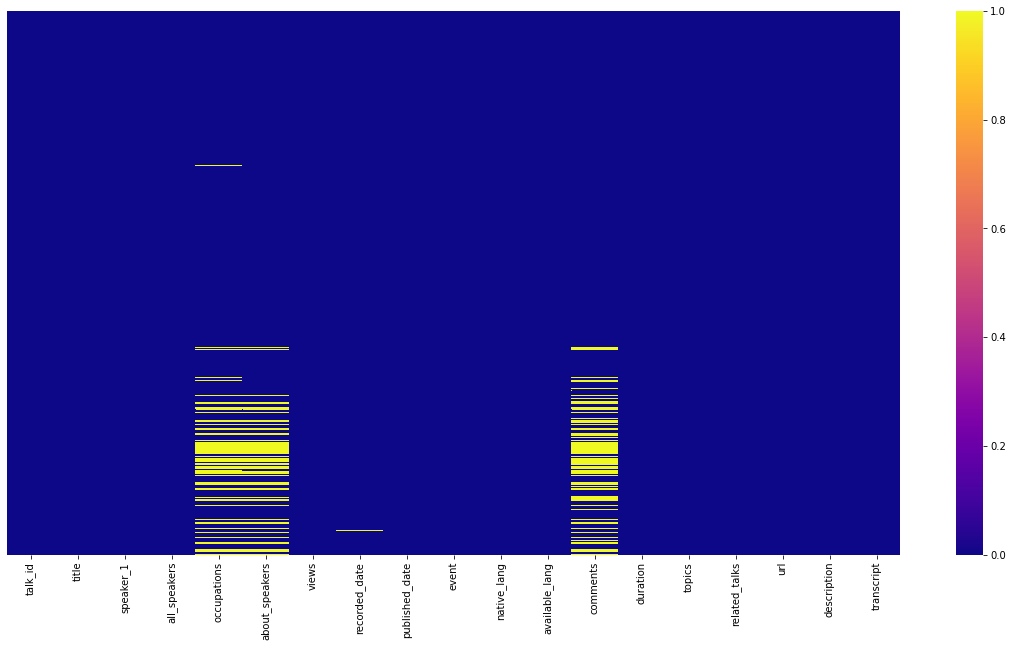

In [111]:
plt.rcParams["figure.figsize"] = (20,10)
sns.heatmap(df.isnull(), yticklabels=False, cbar=True, cmap="plasma")

**From the above analysis**

**The dataset contains NaN values in few columns like:**

* **all_speakers**
* **occupations**
* **about_speakers**
* **recorded_date**
* **comments**

##**3.3 exploring some column**

**Let's see speaker of Top 10 most watched videos**

In [112]:
pop_df = df.nlargest(10,["views"])
pop_df[["speaker_1","views","title"]]

,speaker_1,views,title
4,Sir Ken Robinson,65051954,Do schools kill creativity?
1296,Amy Cuddy,57074270,Your body language may shape who you are
2062,James Veitch,56932551,This is what happens when you reply to spam email
646,Simon Sinek,49730580,How great leaders inspire action
796,Brené Brown,47544833,The power of vulnerability
1724,Julian Treasure,41504331,How to speak so that people want to listen
2108,Tim Urban,37976820,Inside the mind of a master procrastinator
1366,Cameron Russell,33874546,"Looks aren't everything. Believe me, I'm a model."
2724,Sam Berns,33691484,My philosophy for a happy life
1898,Bill Gates,33521780,The next outbreak? We're not ready


###**Most popular videos bar plot analysis**

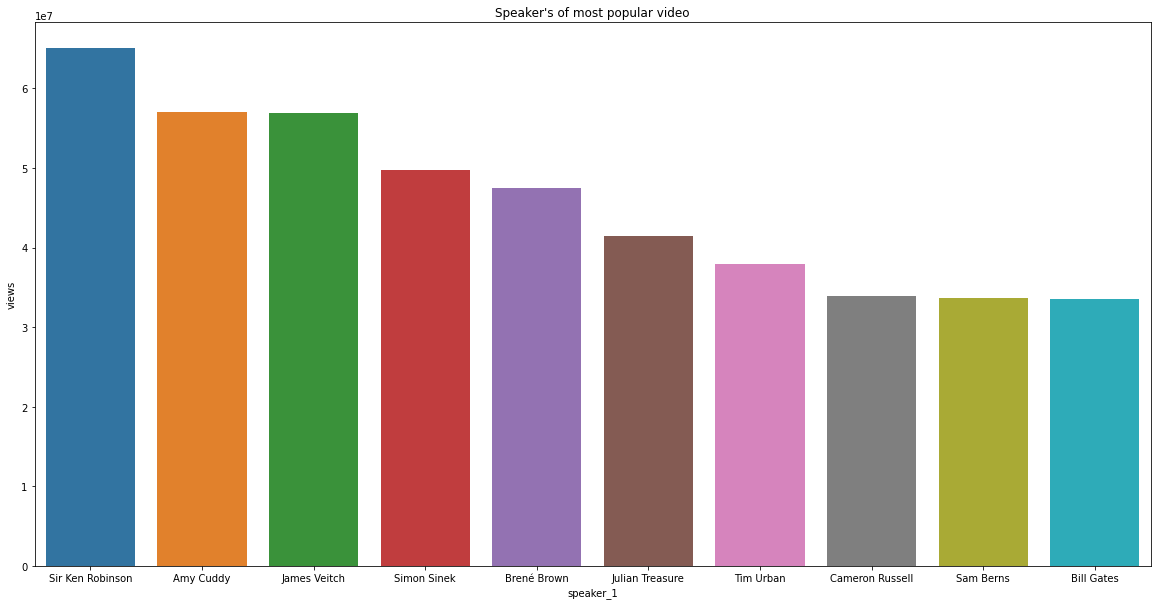

In [113]:
plt.figure(figsize=(20,10))
plt.title("Speaker's of most popular video")
sns.barplot(x="speaker_1",y="views",data=pop_df)

* **from the above plot we can see that "Do Schools Kill Creativity?" is the most popular TED Talk of all time with more than 65 million views whose speaker is Sir Ken Robinson.**

* **If we talk about more than 60 million views then there is only one talk that has crossed 60 million mark while 3 talks have crossed 50 million mark.**

##**Let's find the most popular speaker**

In [114]:
pop_speaker_df=df.groupby('speaker_1').agg({'views' : 'sum'}).nlargest(10,['views'])
pop_speaker_df.reset_index(inplace=True)
pop_speaker_df

,speaker_1,views
0,Alex Gendler,117619583
1,Sir Ken Robinson,84380518
2,James Veitch,78843641
3,Simon Sinek,62661183
4,Brené Brown,61285977
5,Bill Gates,57107176
6,Amy Cuddy,57074270
7,Julian Treasure,54799681
8,Hans Rosling,39871561
9,Tim Urban,37976820


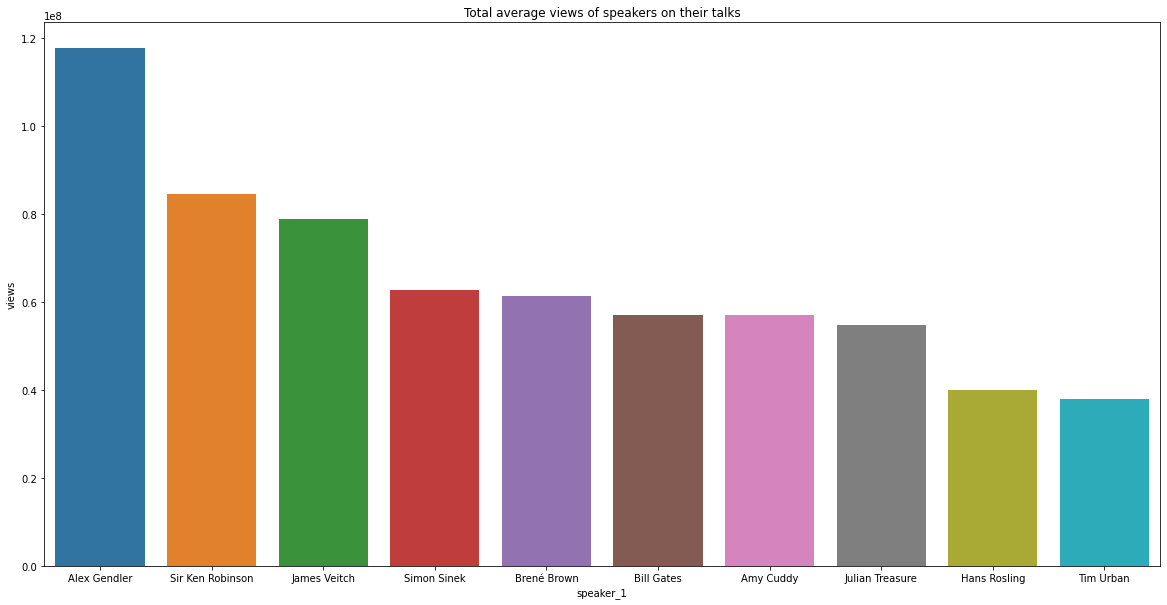

In [115]:
plt.figure(figsize=(20,10))
plt.title("Total average views of speakers on their talks")
sns.barplot(x='speaker_1',y='views',data=pop_speaker_df)

* **Alex Gendler is the most popular speaker**

##**Let's Explore Event column**

In [116]:
df["event"].nunique()

459

**we have total 459 unique event entries**

###**Checking the msost frequent event category**

In [117]:
freq_event_df=df[['event','views']].groupby('event').agg({'views' : 'count'}).nlargest(10,['views'])
freq_event_df.reset_index(inplace=True)
freq_event_df

,event,views
0,TED-Ed,556
1,TED2017,96
2,TED2018,96
3,TED2019,91
4,TED2014,84
5,TED2009,81
6,TED2013,75
7,TED2015,75
8,TED2016,75
9,TED2011,70


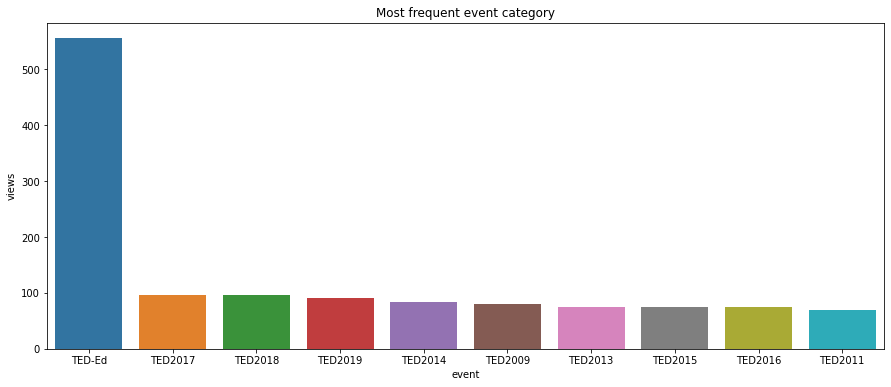

In [118]:
plt.figure(figsize=(15,6))
plt.title('Most frequent event category')
sns.barplot(x='event',y='views',data=freq_event_df)

###**so,the most frequent event category is TED-Ed**

##**Checking the msost Popular event category**

In [119]:
 pop_event_df = df[["event","views"]].groupby("event").agg({"views":"sum"}).nlargest(10,["views"])
 pop_event_df.reset_index(inplace=True)

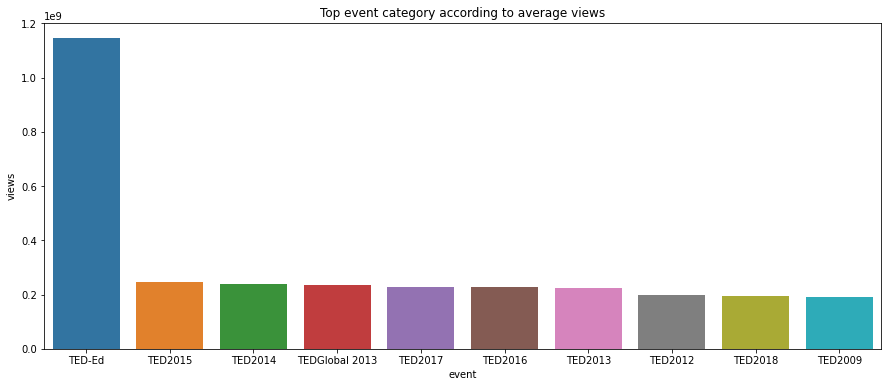

In [120]:
plt.figure(figsize=(15,6))
plt.title('Top event category according to average views')
sns.barplot(x='event',y='views',data=pop_event_df)

**TED-Ed is the most popular event by having maximum views**

## **Let's explore the title column**

There are 157160 words in the combination of all titles.


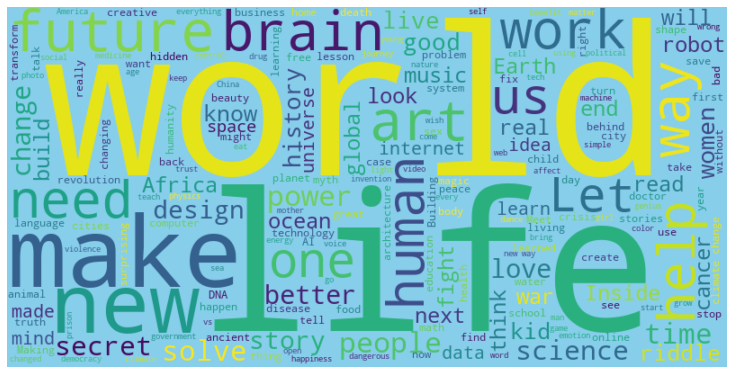

In [121]:
# Making of word cloud from title column

text = " ".join(topic for topic in df.title.astype(str))
print ("There are {} words in the combination of all titles.".format(len(text)))


# Create and generate a word cloud image:

wordcloud = WordCloud(background_color="skyblue", width=800, height=400).generate(text)

plt.rcParams["figure.figsize"] = (15,5)
plt.axis("off")
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

* **here majority of Titles contains words like world,make,life,future,new,art,help,way**


##**Now let's visualise mot popular Topics**

There are 404126 words in the combination of all topics.


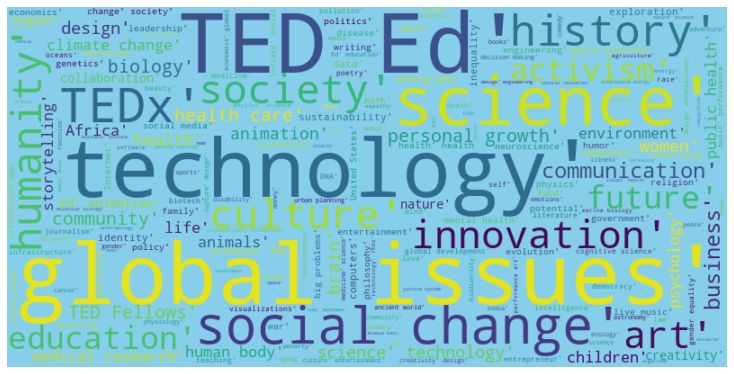

In [122]:
# Making of word cloud from topics column

text = " ".join(topic for topic in df.topics.astype(str))
print ("There are {} words in the combination of all topics.".format(len(text)))


# Create and generate a word cloud image:

wordcloud = WordCloud(background_color="skyblue", width=800, height=400).generate(text)

plt.rcParams["figure.figsize"] = (15,5)
plt.axis("off")
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

**Here Most popular topic tags are TED Ed,technology, global issues, science, humanity**

##**Let's explore published_date**

###applying strptime on published_date column

In [123]:
type("published_date")

str

In [124]:
df.dtypes

talk_id             int64
title              object
speaker_1          object
all_speakers       object
occupations        object
about_speakers     object
views               int64
recorded_date      object
published_date     object
event              object
native_lang        object
available_lang     object
comments          float64
duration            int64
topics             object
related_talks      object
url                object
description        object
transcript         object
dtype: object

In [125]:
import datetime
df['published_date'] = df['published_date'].apply(lambda x: datetime.datetime.strptime(x,"%Y-%m-%d"))

###Extracting release day, month and year from the published date column

In [126]:
df['release_day'] = df['published_date'].apply(lambda x: x.weekday())
df['release_month']=df['published_date'].apply(lambda x: x.month)
df['release_year'] = df['published_date'].apply(lambda x: x.year)

**I have extracted weekday month and year from published_date column and added three separate columns as follows:**

* **release_day**
* **release_month**
* **release_year**

##**Let's explore release_day column.**

### Encoding of release_day column with corresponding week day name

In [127]:
week_day={0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}
df['release_day']=df['release_day'].map(week_day)

### Checking the day of the month having maximum release date 

In [128]:
freq_rel_day=df[['release_day','views']].groupby('release_day').agg({'views' : 'count'})
freq_rel_day=freq_rel_day.sort_values('views',ascending=False)
freq_rel_day.reset_index(inplace=True)
freq_rel_day

,release_day,views
0,Tuesday,857
1,Thursday,832
2,Friday,789
3,Monday,727
4,Wednesday,703
5,Sunday,55
6,Saturday,42


### Barplot to show the day of the week having maximum release date 


Text(0.5, 1.0, 'Most frequent release days')

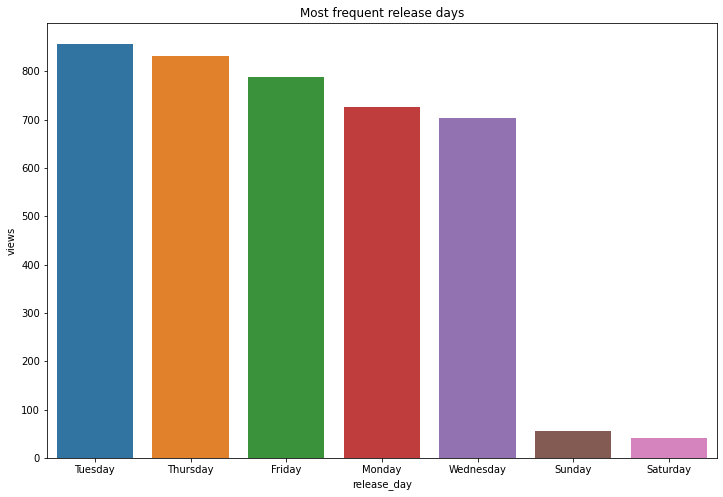

In [129]:
plt.figure(figsize=(12,8))
sns.barplot(x='release_day',y='views',data=freq_rel_day)
plt.title('Most frequent release days')

**Here Most videos are published on Tuesday followed by Thursday.**

##**Let's check the best release day of the week with respect to average views**